# 1. Install requirements and ignore deprecating warning

The command below install the required packages and ignore the depreciating warnings.

In [1]:
!pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset

In [3]:
import pandas as pd

In [4]:
data_df = pd.read_csv('./Cannabis_Retail_Sales_by_Week_Ending.csv')

In [5]:
data_df.head()

Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0  01/14/2023              1485019.32                      1776700.69   
1  01/21/2023              1487815.81                      2702525.61   
2  01/28/2023              1553216.30                      2726237.56   
3  01/31/2023               578840.62                       863287.86   
4  02/04/2023              1047436.20                      1971731.40   

   Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
0                         3261720.01                    33610   
1                         4190341.42                    33005   
2                         4279453.86                    34854   
3                         1442128.48                    12990   
4                         3019167.60                    24134   

   Medical Products Sold  Total Products Sold  \
0                  49312                82922   
1                  77461               110466   
2                  76450               111304   
3                  24023                37013   
4                  56666                80800   

   Adult-Use Average Product Price  Medical Average Product Price  
0                            44.25                          36.23  
1                            45.08                          34.89  
2                            44.56                          35.65  
3                            44.56                          35.93  
4                            43.49                          34.84

# 2. Getting Basic Understanding About the Dataset

In this step we try to understand the basic overview of dataset. This step will answer the generic questions that we have about the dataset on superficial level. The questions are as follows:

2.1 What is the shape of the dataset?

In [6]:
data_df.shape

(88, 9)

2.2 What is the datatype of the columns?

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Week Ending                        88 non-null     object 
 1   Adult-Use Retail Sales             88 non-null     float64
 2   Medical Marijuana Retail Sales     88 non-null     float64
 3   Total Adult-Use and Medical Sales  88 non-null     float64
 4   Adult-Use Products Sold            88 non-null     int64  
 5   Medical Products Sold              88 non-null     int64  
 6   Total Products Sold                88 non-null     int64  
 7   Adult-Use Average Product Price    88 non-null     float64
 8   Medical Average Product Price      88 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 6.3+ KB


In [8]:
type(data_df.iloc[0]["Week Ending"])

str

Out of the 9 Columns, Adult-Use Products Sold, Medical Products Sold, Total Products Sold are the columns which have integer value. Where as  Adult-Use Retail Sales, Medical Marijuana Retail Sales, Total Adult-Use and Medical Sales, Adult-Use Average Product Price, Medical Average Product Price  has foating point value. Weekly Ending has object data type. In row level, these date has string data type

2.3 Is there any missing values in any of the columns?

In [9]:
data_df.isnull().sum()

Week Ending                          0
Adult-Use Retail Sales               0
Medical Marijuana Retail Sales       0
Total Adult-Use and Medical Sales    0
Adult-Use Products Sold              0
Medical Products Sold                0
Total Products Sold                  0
Adult-Use Average Product Price      0
Medical Average Product Price        0
dtype: int64

There is no single columns which has missing value. Due to this observation. There is no need to go for the proces of data imputation

2.4 Is there any duplication on the given dataset?

In [10]:
data_df["Week Ending"].nunique()

88

As we know the there are 88 rows data points in the dataset. It also has 88 unique rows. This means that there is no repetition of date, Hence, every row is unqiue. Hence, we should not operate any dropping duplication operation.

2.5 Is there any columns which can derive new information?

Based on all columns, Week Ending is the column, we can extract month,  year, week and week day. We can find out the start date and end date from the dataset.

In [11]:
import datetime

In [12]:
data_df["Week Ending"] = data_df["Week Ending"].apply(lambda x : datetime.datetime.strptime(x, "%m/%d/%Y"))

In [13]:
data_df["year"] = data_df["Week Ending"].apply(lambda x: x.year)
data_df["month"] = data_df["Week Ending"].apply(lambda x: x.month)
data_df["week"] = data_df["Week Ending"].apply(lambda x: x.week)

In [14]:
data_df[data_df["year"]==2023].groupby("week").count()[["Week Ending"]].rename(columns={"Week Ending": "Week Count"})

Week Count
week            
2              1
3              1
4              1
5              2
6              1
7              1
8              1
9              2
10             1
11             1
12             1
13             2
14             1
15             1
16             1
17             2
18             1
19             1
20             1
21             1
22             2
23             1
24             1
25             1
26             2
27             1
28             1
29             1
30             1
31             2
32             1
33             1
34             1
35             2
36             1
37             1
38             1
39             1
40             1
41             1
42             1
43             1
44             2
45             1
46             1
47             1
48             2
49             1
50             1
51             1
52             2

In [15]:
data_df[data_df["year"]==2024].groupby("week").count()[["Week Ending"]].rename(columns={"Week Ending": "Week Count"})

Week Count
week            
1              1
2              1
3              1
4              1
5              2
6              1
7              1
8              1
9              2
10             1
11             1
12             1
13             2
14             1
15             1
16             1
17             1
18             2
19             1
20             1
21             1
22             1

It has been found that for both year 2023 and 2024, there are two data point for same week ending. It means there are two data point taken from same week which  seems to be pretty dubious

In [16]:
data_df["weekday"] = data_df["Week Ending"].apply(lambda x: x.strftime('%A'))

In [17]:
from collections import Counter

In [18]:
Counter(data_df["weekday"])

Counter({'Saturday': 72,
         'Tuesday': 4,
         'Friday': 3,
         'Sunday': 3,
         'Thursday': 3,
         'Wednesday': 2,
         'Monday': 1})

The Week End column defines the week of week as a saturday. So the data has been recorded every saturday. However, there are some data which doesnot belong to saturday. Lets dive deep into cause why there are data which do not belong to week end which is saturday

In [19]:
data_df[data_df["weekday"]!="Saturday"]

Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
3   2023-01-31               578840.62                       863287.86   
8   2023-02-28               700300.78                       853033.11   
13  2023-03-31              1831943.14                      2292570.07   
19  2023-04-30               286293.00                       183661.24   
24  2023-05-31              1280002.90                      1049495.20   
29  2023-06-30              2544960.59                      2408269.64   
35  2023-07-31               725428.91                       545129.04   
40  2023-08-31              2128558.59                      1687225.97   
50  2023-10-31              1293239.48                       938302.59   
55  2023-11-30              2228496.20                      1458784.44   
61  2023-12-31               450004.14                       215083.51   
66  2024-01-31              1752481.44                      1119511.40   
71  2024-02-29              2329512.30                      1368759.76   
77  2024-03-31               163995.01                        62837.67   
82  2024-04-30              1291739.27                       733131.16   
87  2024-05-31              3071008.25                      1438312.36   

    Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
3                          1442128.48                    12990   
8                          1553333.89                    17570   
13                         4124513.21                    45080   
19                          469954.24                     7167   
24                         2329498.10                    32948   
29                         4953230.23                    63479   
35                         1270557.95                    18902   
40                         3815814.56                    53520   
50                         2231542.07                    33482   
55                         3687280.64                    57484   
61                          665087.65                    12346   
66                         2871992.84                    45201   
71                         3698272.96                    57623   
77                          226832.68                     4188   
82                         2024870.43                    32945   
87                         4509320.61                    80549   

    Medical Products Sold  Total Products Sold  \
3                   24023                37013   
8                   23469                41039   
13                  62239               107319   
19                   4973                12140   
24                  29594                62542   
29                  64574               128053   
35                  14037                32939   
40                  43017                96537   
50                  25982                59464   
55                  36094                93578   
61                   6250                18596   
66                  26890                75684   
71                  34916                96853   
77                   1916                 6104   
82                  21082                54027   
87                  42190               122739   

    Adult-Use Average Product Price  Medical Average Product Price  year  \
3                             44.56                          35.93  2023   
8                             39.96                          36.35  2023   
13                            40.65                          36.66  2023   
19                            39.95                          36.93  2023   
24                            38.85                          35.46  2023   
29                            40.19                          37.42  2023   
35                            38.42                          38.88  2023   
40                            39.76                          39.30  2023   
50                            38.61                          36.10  2023   
55        

After looking into the dataset,  We can conclude that, though data recorded should be only on Week End, There is a data which has been recorded on month Ending as well. Hence, There is a data collection Noise. Hence to fix this issue, We remove the Weekdays other than Saturday.

In [20]:
data_df = data_df[data_df["weekday"]=="Saturday"]

In [21]:
data_df.head()

Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0  2023-01-14              1485019.32                      1776700.69   
1  2023-01-21              1487815.81                      2702525.61   
2  2023-01-28              1553216.30                      2726237.56   
4  2023-02-04              1047436.20                      1971731.40   
5  2023-02-11              1671205.80                      2815023.87   

   Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
0                         3261720.01                    33610   
1                         4190341.42                    33005   
2                         4279453.86                    34854   
4                         3019167.60                    24134   
5                         4486229.67                    38764   

   Medical Products Sold  Total Products Sold  \
0                  49312                82922   
1                  77461               110466   
2                  76450               111304   
4                  56666                80800   
5                  77454               116218   

   Adult-Use Average Product Price  Medical Average Product Price  year  \
0                            44.25                          36.23  2023   
1                            45.08                          34.89  2023   
2                            44.56                          35.65  2023   
4                            43.49                          34.84  2023   
5                            43.33                          36.30  2023   

   month  week   weekday  
0      1     2  Saturday  
1      1     3  Saturday  
2      1     4  Saturday  
4      2     5  Saturday  
5      2     6  Saturday

In [22]:
data_df.columns

Index(['Week Ending', 'Adult-Use Retail Sales',
       'Medical Marijuana Retail Sales', 'Total Adult-Use and Medical Sales',
       'Adult-Use Products Sold', 'Medical Products Sold',
       'Total Products Sold', 'Adult-Use Average Product Price',
       'Medical Average Product Price', 'year', 'month', 'week', 'weekday'],
      dtype='object')

# 3. Statistical Analysis and Exploratory Data Analysis

## 3.1 Basic EDA

Lets start with basic statistic information about the dataset columns

In [23]:
date_columns = ["Week Ending", "year", "month","week","weekday"]

In [24]:
data_df.drop(columns=date_columns).describe()

Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
count            7.200000e+01                    7.200000e+01   
mean             2.789844e+06                    2.156035e+06   
std              9.155922e+05                    5.647862e+05   
min              4.188127e+05                    4.113941e+05   
25%              2.144398e+06                    1.938216e+06   
50%              3.058015e+06                    2.258282e+06   
75%              3.538809e+06                    2.519503e+06   
max              4.495102e+06                    3.085787e+06   

       Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
count                       7.200000e+01                72.000000   
mean                        4.945879e+06             70934.569444   
std                         1.231858e+06             24474.641966   
min                         8.302068e+05             10364.000000   
25%                         4.686945e+06             53066.250000   
50%                         5.423234e+06             77067.000000   
75%                         5.661671e+06             90494.000000   
max                         7.290974e+06            120223.000000   

       Medical Products Sold  Total Products Sold  \
count              72.000000            72.000000   
mean            58856.680556        129865.291667   
std             15573.342609         33308.045482   
min             11012.000000         21485.000000   
25%             53982.000000        123450.000000   
50%             61313.500000        139771.000000   
75%             67756.500000        149808.500000   
max             86307.000000        199162.000000   

       Adult-Use Average Product Price  Medical Average Product Price  
count                        72.000000                      72.000000  
mean                         39.692083                      36.723611  
std                           1.681396                       1.557513  
min                          36.930000                      34.200000  
25%                          38.552500                      35.657500  
50%                          39.600000                      36.355000  
75%                          40.440000                      37.595000  
max                          45.080000                      41.830000

Did you understand any of the numeric stats value present?. Me too!!. These jargon on number does not say anything. lets sketch some graph, lets  visualize and try to make sense out of it.

In [25]:
# Import the data visualization package
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

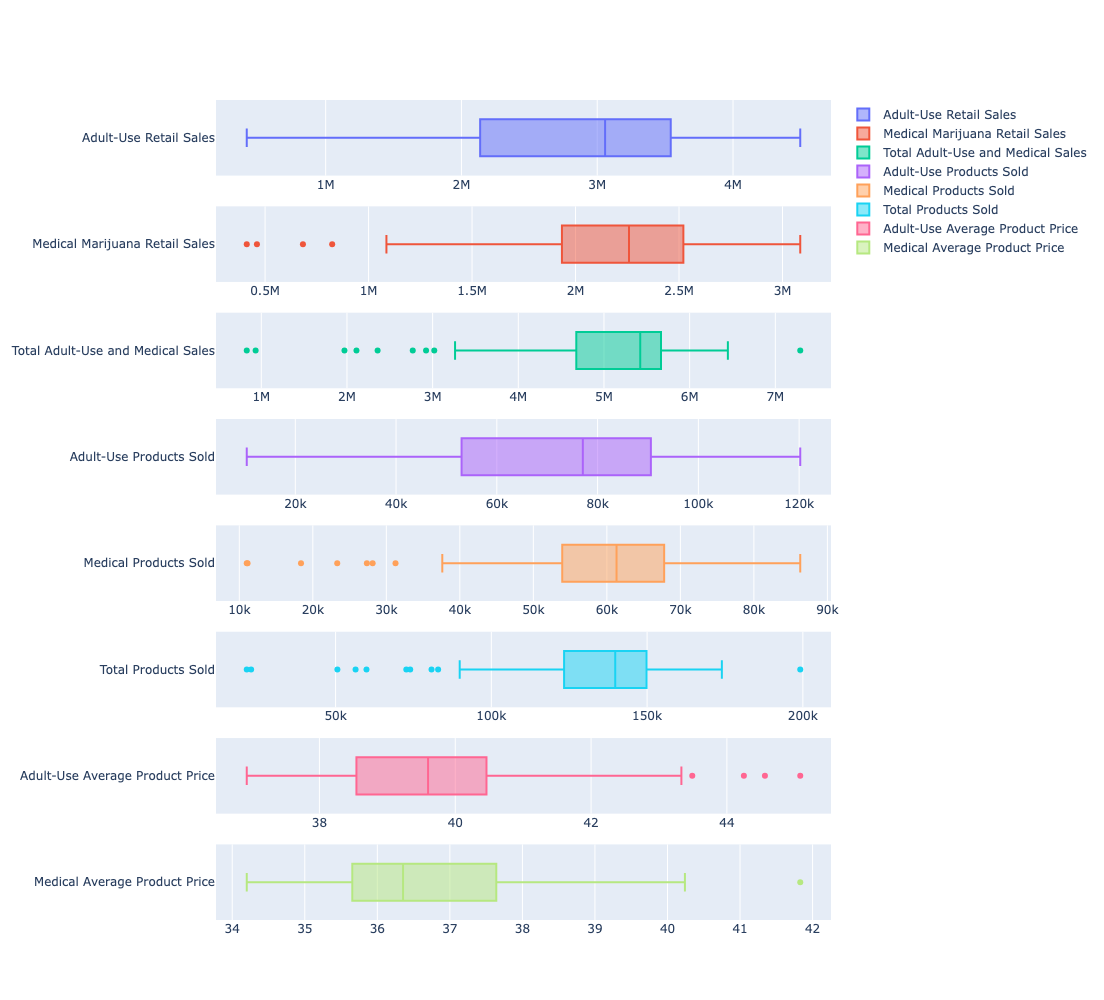

In [26]:
fig = make_subplots(cols=1, rows=len(data_df.drop(columns=date_columns).columns))
for idx,item in enumerate(data_df.drop(columns=date_columns).columns):
  fig.add_trace(go.Box(x=data_df[item].values, name=item),row=idx+1, col=1)
  fig.update_layout(autosize=True,height=1000)
fig.show()

Adult-Use Retail Sales and Adult Product Sold do not have oultiers, whereas all other columns have outliers. Lets find out why there is outlier on others columns.

Lets check on year on year basis and try to figure out where do we have outlier

/opt/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




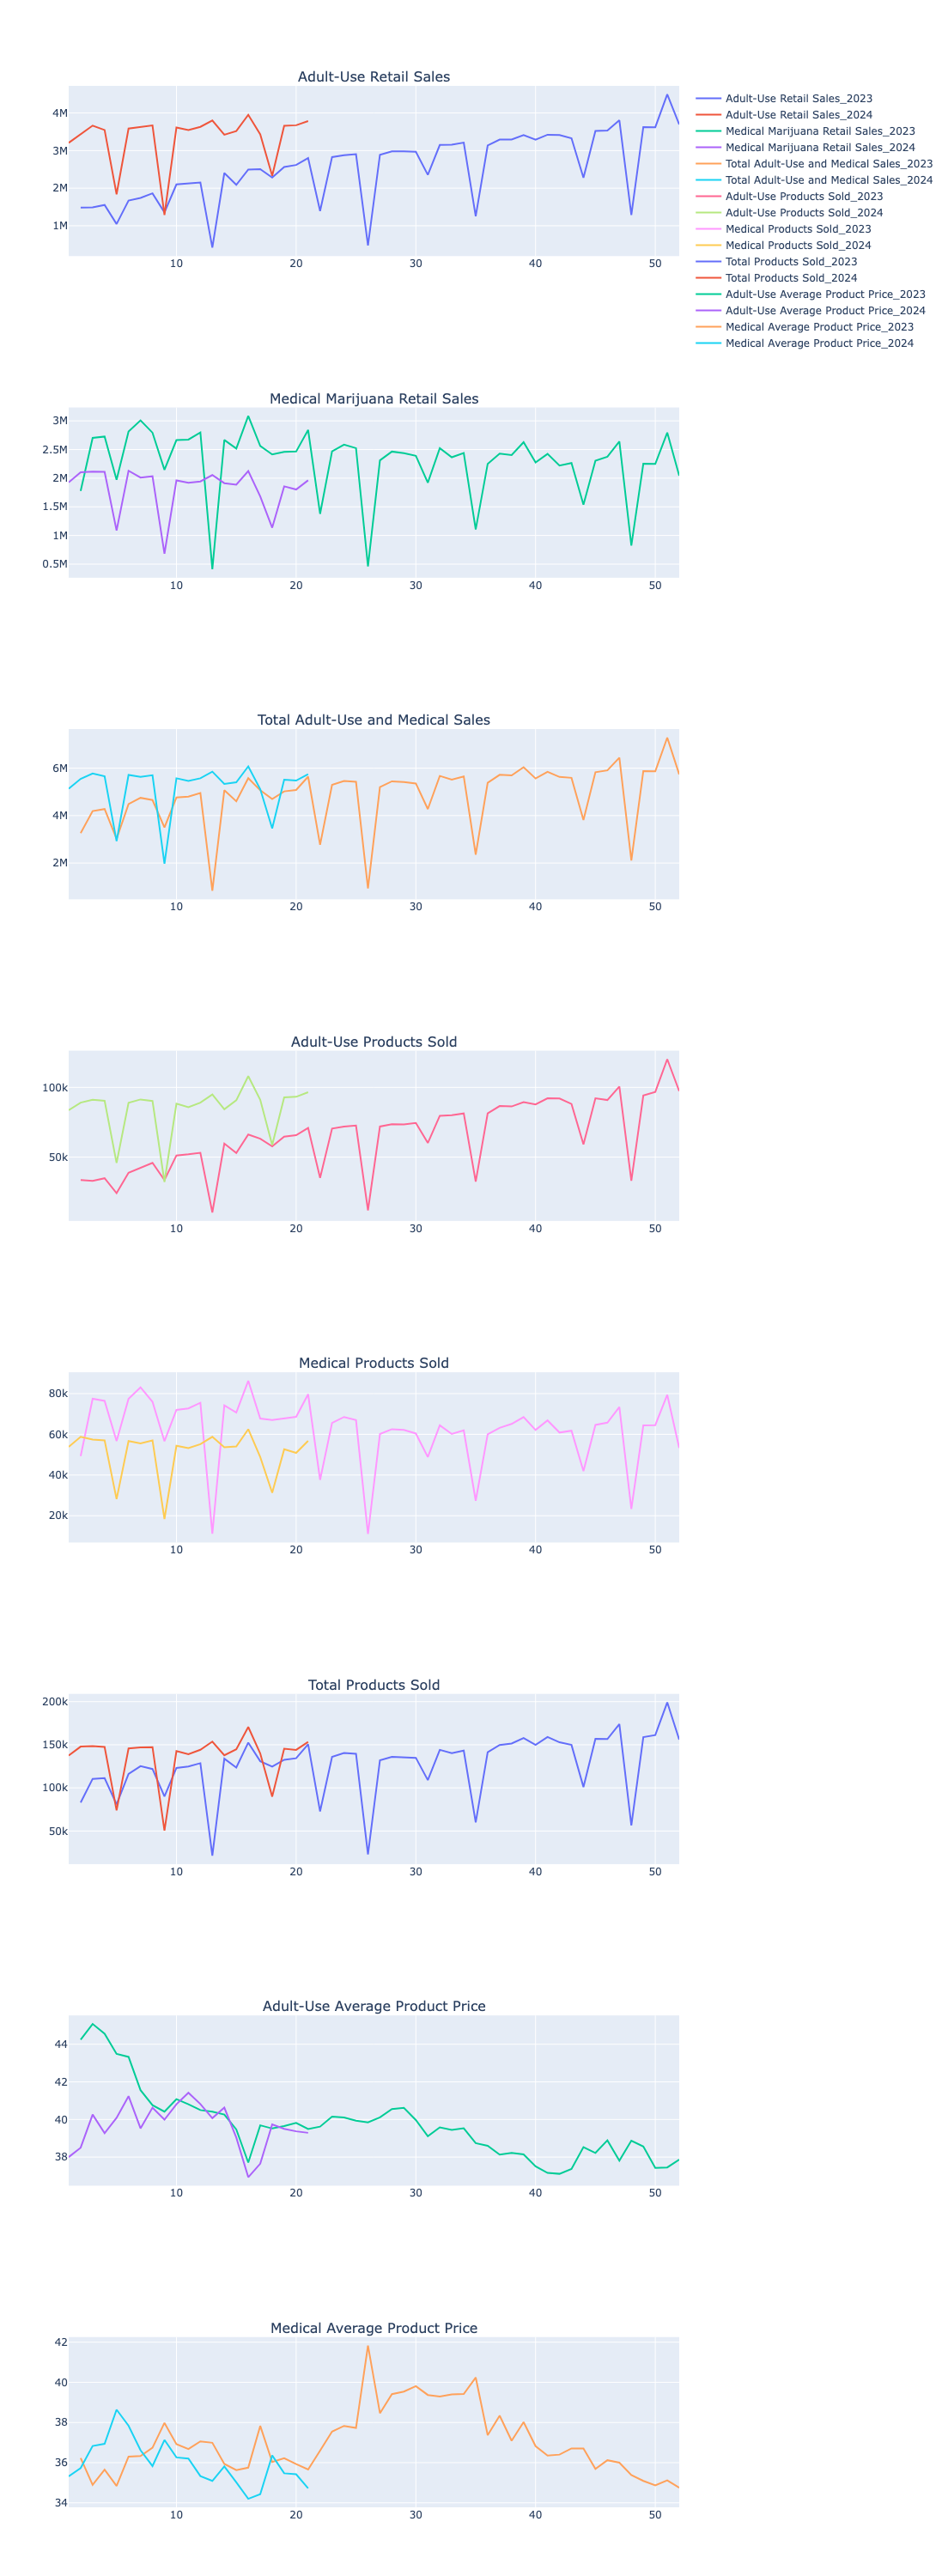

In [27]:
fig = make_subplots(cols=1, rows=len(data_df.drop(columns=date_columns).columns), subplot_titles=tuple(data_df.drop(columns=date_columns).columns))
df_2023 = data_df[data_df["year"]==2023]
df_2024 = data_df[data_df["year"]==2024]
for idx,item in enumerate(data_df.drop(columns=date_columns).columns):
  fig.add_trace(go.Line(x = df_2023["week"].values, y=df_2023[item].values, name=item+"_2023"),row=idx+1, col=1)
  fig.update_layout(autosize=True,height=3000)
  fig.add_trace(go.Line(x = df_2024["week"].values, y=df_2024[item].values, name=item+"_2024"),row=idx+1, col=1)
  fig.update_layout(autosize=True,height=3000)
del df_2023
del df_2024
fig.show()

There is a jump in sale for year for Adult-Use Retail Sale. However, there has been a decline in Medical Marijuana Retail Sale. The overall sale or the total sale steadily increasing.

## 3.2 Find the correlation between the different variables

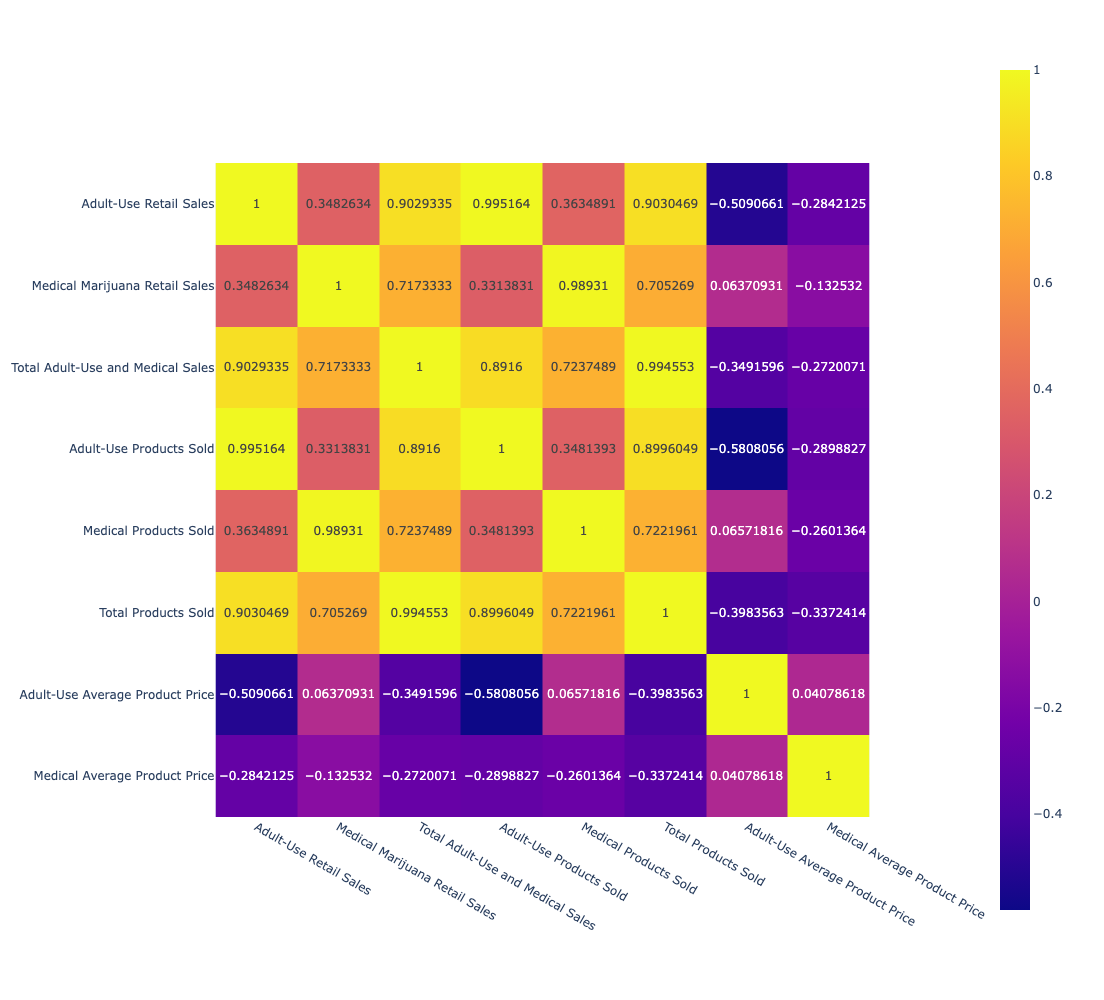

In [28]:
px.imshow(data_df.drop(columns=date_columns).corr(), text_auto=True, height=1000, width=1000)

The total Sales has higher correlation to Adult-Use Retail Sales compared to Medical Marijuana Retail Sales. Sale and product Sold are higly correlated. However, there has been no corrleatiob between average Product Price with any other columns. 

## 3.3 Drop Derivative Values

In [29]:
max(abs(data_df["Adult-Use Retail Sales"]/data_df["Adult-Use Products Sold"]-data_df["Adult-Use Average Product Price"]))

0.94317523989303

In [30]:
max(abs(data_df["Medical Marijuana Retail Sales"]/data_df["Medical Products Sold"]-data_df["Medical Average Product Price"]))

3.597982284942198

Since total Sale and total product sold can be derived from other parameter. Similarly, we can calculate the average price. Hence removing these columns

In [31]:
drop_cal_col = ['Total Adult-Use and Medical Sales', 'Total Products Sold',
                 'Adult-Use Average Product Price', 'Medical Average Product Price']

In [32]:
data_df.drop(columns=drop_cal_col, inplace=True)

In [33]:
data_df.head()

Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0  2023-01-14              1485019.32                      1776700.69   
1  2023-01-21              1487815.81                      2702525.61   
2  2023-01-28              1553216.30                      2726237.56   
4  2023-02-04              1047436.20                      1971731.40   
5  2023-02-11              1671205.80                      2815023.87   

   Adult-Use Products Sold  Medical Products Sold  year  month  week   weekday  
0                    33610                  49312  2023      1     2  Saturday  
1                    33005                  77461  2023      1     3  Saturday  
2                    34854                  76450  2023      1     4  Saturday  
4                    24134                  56666  2023      2     5  Saturday  
5                    38764                  77454  2023      2     6  Saturday

## 3.3 Drop Correlation 

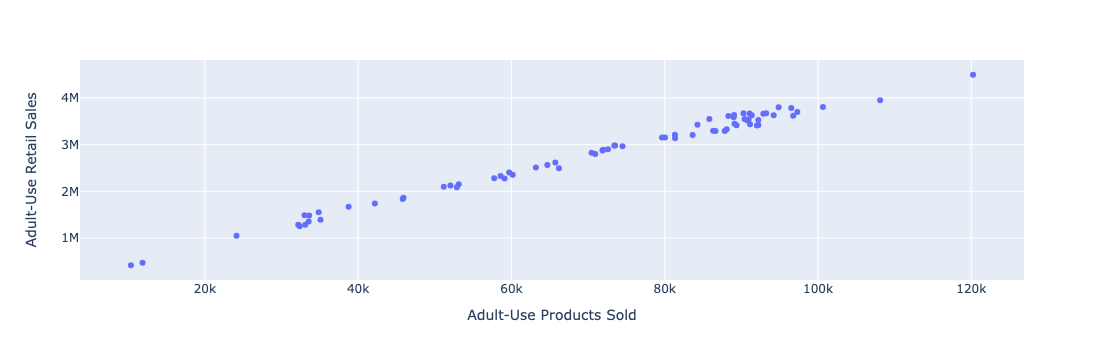

In [34]:
px.scatter(data_df,x='Adult-Use Products Sold', y='Adult-Use Retail Sales')

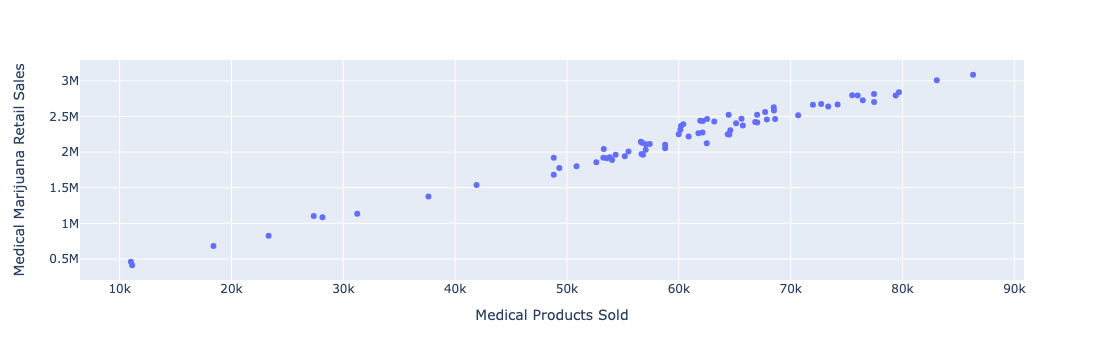

In [35]:
px.scatter(data_df,x='Medical Products Sold', y='Medical Marijuana Retail Sales')

 There is not need to Time Series Analysis, Based on Prouct Sold, we can predict approximate number of product sold using linear regression.

In [36]:
data_df.drop(columns=["Adult-Use Products Sold", "Medical Products Sold"], inplace=True)

In [37]:
data_df.head()

Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  year  \
0  2023-01-14              1485019.32                      1776700.69  2023   
1  2023-01-21              1487815.81                      2702525.61  2023   
2  2023-01-28              1553216.30                      2726237.56  2023   
4  2023-02-04              1047436.20                      1971731.40  2023   
5  2023-02-11              1671205.80                      2815023.87  2023   

   month  week   weekday  
0      1     2  Saturday  
1      1     3  Saturday  
2      1     4  Saturday  
4      2     5  Saturday  
5      2     6  Saturday

## 3.4 Statistical Hypothesis Testing (Seasonal Decompostion)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
def plot_decomposition(df, col, model="additive", period=4):
    """
    Plot Seasonal Decomposition Graph
    args:
        df [DataFrame]: input dataframe
        col[string]: selected column
        model[string] : model type Default["additive"]
        period[int]: time period E.g. 1 for annual
    """
    result = seasonal_decompose(df[col], model=model, period=period)
    fig = make_subplots(
            rows=4, cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"])
    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.observed, mode='lines'),
                row=1, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.trend.index, y=result.trend, mode='lines'),
                row=2, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines'),
                row=3, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.resid.index, y=result.resid, mode='lines'),
                row=4, col=1,
            )
    return fig

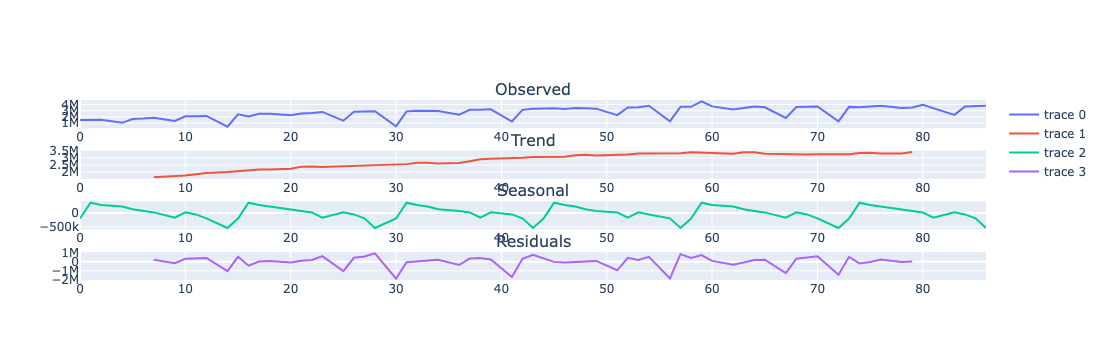

In [40]:
fig_adult_sale = plot_decomposition(data_df, col="Adult-Use Retail Sales", period=12)
fig_adult_sale.show()

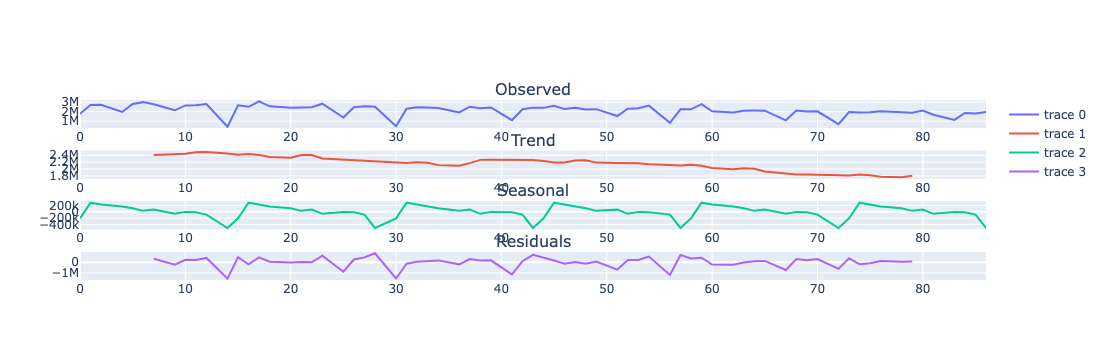

In [41]:
fig_adult_sale = plot_decomposition(data_df, col="Medical Marijuana Retail Sales", period=12)
fig_adult_sale.show()

It has been observed that there is a growing trend for Adult-Use Retail Sale, and declining trends for Mdeical Marijuana Retail Sales 

# 4 Data Preprocessing and Transformation

## 4.1 Stationary Test Through KPSS Testing

In [42]:
from statsmodels.tsa.stattools import kpss, grangercausalitytests

Null Hypothesis: Data are stationary

Alternate Hypothesis: Data are not stationary

In [43]:
p_value_1 = str(kpss(data_df["Adult-Use Retail Sales"])[1])

/var/folders/x_/yg851zk53yx1rg9mfhp0xb2r0000gn/T/ipykernel_9590/1463870209.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [44]:
"p-value forAdult-Use Retail Sales: "+p_value_1

'p-value forAdult-Use Retail Sales: 0.01'

In [45]:
p_value_2 = str(kpss(data_df["Medical Marijuana Retail Sales"])[1])

/var/folders/x_/yg851zk53yx1rg9mfhp0xb2r0000gn/T/ipykernel_9590/470825377.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [46]:
"p-value forAdult-Use Retail Sales: "+p_value_2

'p-value forAdult-Use Retail Sales: 0.01'

Since both value is less than 0.05 hence we reject the null hypothesis, Hence both the time series data is not stationary. Hence we need to perform the transformation using differencing method.

In [47]:
df_processed = data_df.set_index("Week Ending").drop(columns=["year", "month", "week", "weekday"]).diff().dropna()

In [48]:
p_value_1 = str(kpss(df_processed["Adult-Use Retail Sales"])[1])

/var/folders/x_/yg851zk53yx1rg9mfhp0xb2r0000gn/T/ipykernel_9590/3496354184.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [49]:
"p-value forAdult-Use Retail Sales: "+p_value_1

'p-value forAdult-Use Retail Sales: 0.1'

In [50]:
p_value_2 = str(kpss(df_processed["Medical Marijuana Retail Sales"].dropna())[1])

/var/folders/x_/yg851zk53yx1rg9mfhp0xb2r0000gn/T/ipykernel_9590/859039005.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [51]:
"p-value forAdult-Use Retail Sales: "+p_value_2

'p-value forAdult-Use Retail Sales: 0.1'

p Value is greater than or equal to 0.05. Hence, it Accept the null  hypothesis which is Time Series Data are stationary for the cases

## 4.2 Granger Causality Testing

Null Hypothesis: Lagged value of Time series data X do not granger cause Time Series Y

In [52]:
grangercausalitytests(df_processed, maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9838  , p=0.3248  , df_denom=67, df_num=1
ssr based chi2 test:   chi2=1.0279  , p=0.3107  , df=1
likelihood ratio test: chi2=1.0204  , p=0.3124  , df=1
parameter F test:         F=0.9838  , p=0.3248  , df_denom=67, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5718  , p=0.5674  , df_denom=64, df_num=2
ssr based chi2 test:   chi2=1.2330  , p=0.5398  , df=2
likelihood ratio test: chi2=1.2221  , p=0.5428  , df=2
parameter F test:         F=0.5718  , p=0.5674  , df_denom=64, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1815  , p=0.9086  , df_denom=61, df_num=3
ssr based chi2 test:   chi2=0.6069  , p=0.8949  , df=3
likelihood ratio test: chi2=0.6042  , p=0.8955  , df=3
parameter F test:         F=0.1815  , p=0.9086  , df_denom=61, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1807  , p=0.9475  , df_d

{1: ({'ssr_ftest': (0.9838445650144494, 0.32482025189841324, 67.0, 1),
   'ssr_chi2test': (1.0278973067315145, 0.31065304197851557, 1),
   'lrtest': (1.0204234342609197, 0.3124185904108483, 1),
   'params_ftest': (0.9838445650162796, 0.32482025189796637, 67.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5718063235560028, 0.567362080042257, 64.0, 2),
   'ssr_chi2test': (1.232957385167631, 0.5398420443999323, 2),
   'lrtest': (1.2220710532778867, 0.5427885059965066, 2),
   'params_ftest': (0.5718063235631662, 0.5673620800382644, 64.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.18147599297722378, 0.9085805054910108, 61.0, 3),
   'ssr_chi2test': (0.6069033207762894, 0.8948502133101814, 3),
   'lrtest': (0.604211007382446, 0.8954676863760389, 3),
   'params_ftest': (0.18147599297488604, 0.9085805054925843, 61.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 

p_value>=0.05, hence ite accept null hypothesis which means TS1 doesnot have significant contribution for predicting TS2

In [53]:
grangercausalitytests(df_processed[['Medical Marijuana Retail Sales',
                                    'Adult-Use Retail Sales']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2086  , p=0.6493  , df_denom=67, df_num=1
ssr based chi2 test:   chi2=0.2179  , p=0.6406  , df=1
likelihood ratio test: chi2=0.2176  , p=0.6409  , df=1
parameter F test:         F=0.2086  , p=0.6493  , df_denom=67, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3456  , p=0.7091  , df_denom=64, df_num=2
ssr based chi2 test:   chi2=0.7453  , p=0.6889  , df=2
likelihood ratio test: chi2=0.7413  , p=0.6903  , df=2
parameter F test:         F=0.3456  , p=0.7091  , df_denom=64, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5104  , p=0.6766  , df_denom=61, df_num=3
ssr based chi2 test:   chi2=1.7070  , p=0.6354  , df=3
likelihood ratio test: chi2=1.6859  , p=0.6401  , df=3
parameter F test:         F=0.5104  , p=0.6766  , df_denom=61, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2665  , p=0.8983  , df_d

{1: ({'ssr_ftest': (0.20860017020939786, 0.6493440967242063, 67.0, 1),
   'ssr_chi2test': (0.21794047633817687, 0.6406136726302161, 1),
   'lrtest': (0.21760190710392635, 0.6408732512792692, 1),
   'params_ftest': (0.20860017020917698, 0.6493440967243705, 67.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3456374340225198, 0.7090819859815556, 64.0, 2),
   'ssr_chi2test': (0.7452807171110583, 0.6889129499450507, 2),
   'lrtest': (0.7412845153357921, 0.690290843648728, 2),
   'params_ftest': (0.34563743401991703, 0.7090819859833788, 64.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5104129012403044, 0.6765993078776134, 61.0, 3),
   'ssr_chi2test': (1.7069546205413455, 0.6353887327328225, 3),
   'lrtest': (1.6858823133168244, 0.6400770285216668, 3),
   'params_ftest': (0.510412901253908, 0.6765993078683914, 61.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

p_value>=0.05, hence ite accept null hypothesis which means TS1 doesnot have significant contribution for predicting TS2

These shows there is no dependency on prediction of two medicines , Hence we can perform univariate Modelling  there is no need to do VAR

# 5 Model Tuning and Selection

## 5.1 Calculating the model paramter for Autoregressive  term p

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

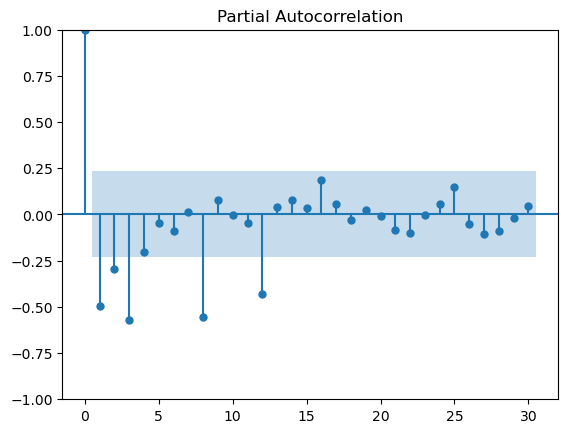

In [55]:
fig = plot_pacf(df_processed['Adult-Use Retail Sales'].values, lags=30)
fig.show()

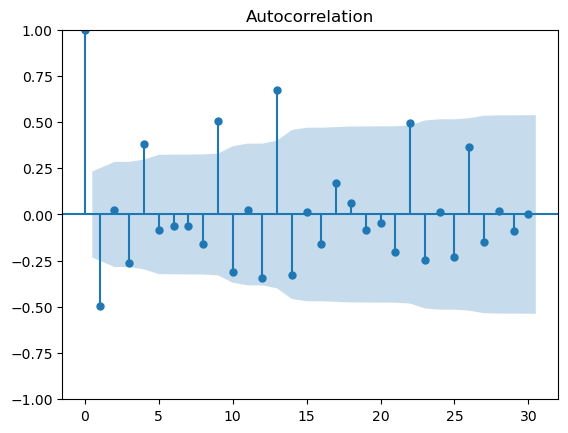

In [56]:
fig = plot_acf(df_processed['Adult-Use Retail Sales'].values, lags=30)
fig.show()

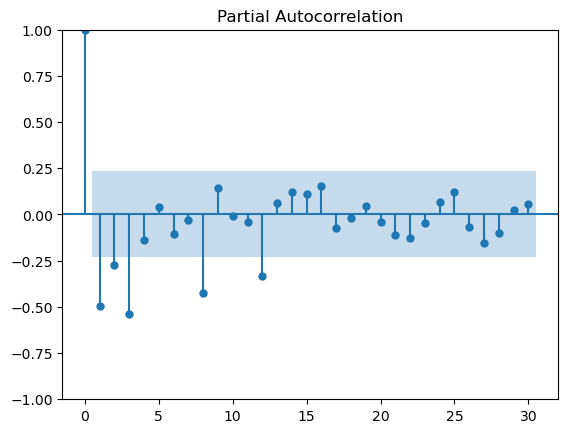

In [57]:
fig = plot_pacf(df_processed['Medical Marijuana Retail Sales'].values, lags=30)
fig.show()

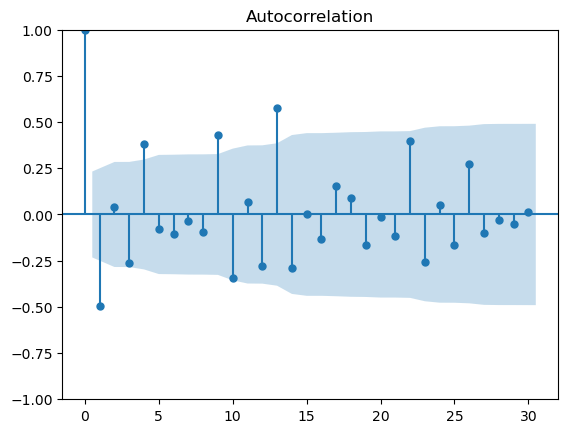

In [58]:
fig = plot_acf(df_processed['Medical Marijuana Retail Sales'].values, lags=30)
fig.show()

Based on the above experiment, p and q value should be 2,2

# 6 Model Building and Inference

In [59]:
split_index = int(0.8*len(df_processed))

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
import math
from sklearn.metrics import mean_squared_error

In [62]:
train_data = df_processed.iloc[:split_index]
test_data = df_processed.iloc[split_index:]

In [63]:
def train_infer_evaluate(train_data,test_data, col):
  past_record = train_data[col].to_list()
  forecast_record = []
  for idx in range(len(test_data)):
    model = ARIMA(past_record, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    forecast_record.append(output[0])
    past_record.append(test_data.iloc[idx][col])
  return forecast_record

In [64]:
prediction = train_infer_evaluate(train_data, test_data, "Adult-Use Retail Sales")

In [65]:
outcome = data_df.iloc[split_index:]["Adult-Use Retail Sales"].shift(1).dropna()+df_processed["Adult-Use Retail Sales"].iloc[split_index:].tolist()

In [66]:
pred = data_df.iloc[split_index:]["Adult-Use Retail Sales"].shift(1).dropna()+prediction

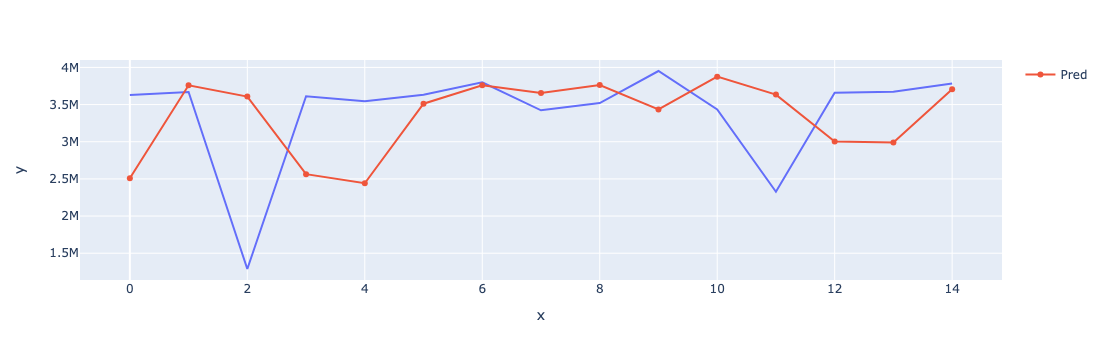

In [67]:
fig = px.line(x=[i for i in range(len(prediction))], y = outcome)
fig.add_scatter(x=[i for i in range(len(prediction))], y = pred, name="Pred")
fig.show()

In [68]:
prediction = train_infer_evaluate(train_data, test_data, "Medical Marijuana Retail Sales")

In [69]:
outcome = data_df.iloc[split_index:]["Medical Marijuana Retail Sales"].shift(1).dropna()+df_processed["Medical Marijuana Retail Sales"].iloc[split_index:].tolist()

In [70]:
pred = data_df.iloc[split_index:]["Medical Marijuana Retail Sales"].shift(1).dropna()+prediction

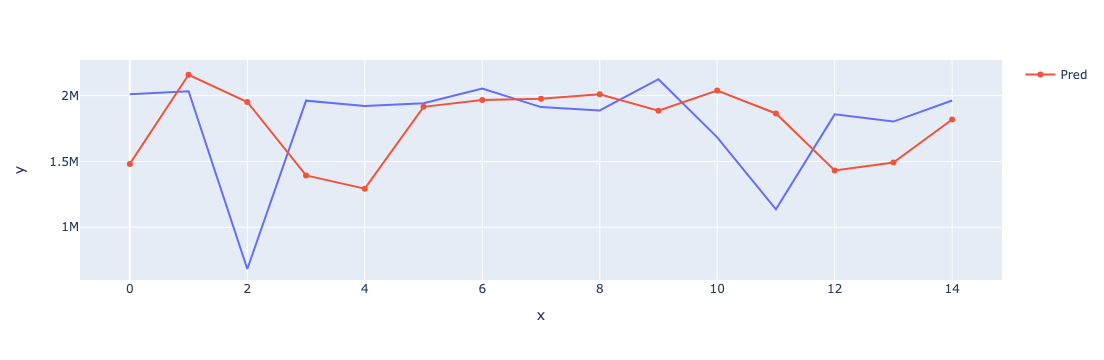

In [71]:
fig = px.line(x=[i for i in range(len(prediction))], y = outcome)
fig.add_scatter(x=[i for i in range(len(prediction))], y = pred, name="Pred")
fig.show()

# 7. Summary and Key takeways

1. The dataset have week ending and month ending values.
2. There is growing trends on Adult-Use Retail Sale and Product where as vice versa for Medical Marijuana Retail Sales and Product.
3. Both the sales are independent of each other and do not effect the growing trend for each other.

# 8. Future Work

1. Normalization and standarization of Time Series Dataset
2. Use ML approach such as LSTM and GRU for prediction once we have sufficient dataset
3. Optimize the current value by selecting better p,q and d value with hit and trial experimentation